In [1]:
# import packages
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time # helper libraries

Using TensorFlow backend.


In [2]:
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [3]:
# build model
model = Sequential()

model.add(LSTM(input_dim = 1, output_dim = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(output_dim=1))
model.add(Activation('linear'))
model.summary()

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print("Compilatin time: ", time.time() - start)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lstm_1 (LSTM)                    (None, None, 50)      10400       lstm_input_1[0][0]               
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, None, 50)      0           lstm_1[0][0]                     
____________________________________________________________________________________________________
lstm_2 (LSTM)                    (None, 100)           60400       dropout_1[0][0]                  
____________________________________________________________________________________________________
dropout_2 (Dropout)              (None, 100)           0           lstm_2[0][0]                     
___________________________________________________________________________________________

In [4]:
# train model
model.fit(X_train, y_train, batch_size=512, nb_epoch=1, validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/1
3523/3523 [==============================] - 9s - loss: 0.0073 - val_loss: 9.5800e-04


yo


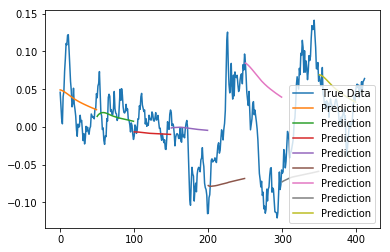

In [5]:
# plot predictions
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)